In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensornets as nets
import numpy as np
from PIL import Image

import dataset

In [3]:
DATA_DIR = pathlib.Path('./data/pets')

In [16]:
loader = dataset.ImageDatasetLoader(DATA_DIR)
ds = loader.build_dataset()

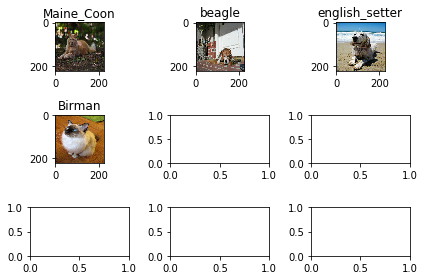

In [23]:
loader.draw_images(ds)

In [24]:
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])
outputs = tf.placeholder(tf.float32, [None, 37])
model = nets.ResNet50(inputs, is_training=True, classes=37)

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
loss = tf.losses.softmax_cross_entropy(outputs, model)
# train = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(loss)
train = tf.train.t(learning_rate=1e-5).minimize(loss)

In [32]:
it = ds.make_one_shot_iterator()
b = it.get_next()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(model.pretrained())
    while True:
        try:
            image, label = sess.run(b)
        except tf.errors.OutOfRangeError:
            break
        sess.run(train, {inputs: image, outputs: label})
    save_path = saver.save(sess, '/tmp/test.ckpt')
    print(save_path)

FailedPreconditionError: Attempting to use uninitialized value beta1_power
	 [[node save/SaveV2 (defined at <ipython-input-32-cb55102c98b6>:4) ]]

Caused by op 'save/SaveV2', defined at:
  File "/usr/local/homebrew/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/homebrew/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/homebrew/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 523, in run_forever
    self._run_once()
  File "/usr/local/homebrew/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1758, in _run_once
    handle._run()
  File "/usr/local/homebrew/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-cb55102c98b6>", line 4, in <module>
    saver = tf.train.Saver()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 832, in __init__
    self.build()
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 510, in _build_internal
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 210, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 124, in save_op
    tensors)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1807, in save_v2
    name=name)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/hbc/workshop/b4fun/fastai/lesson1/venv/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value beta1_power
	 [[node save/SaveV2 (defined at <ipython-input-32-cb55102c98b6>:4) ]]


Tensor("resnet50_1/probs:0", shape=(?, 37), dtype=float32)
